In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
count_df = pd.read_csv("./data/yonge_count.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
count_df["time"] = pd.to_datetime(count_df["time"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

In [4]:
count_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute', 'location'],inplace=True,axis=1)
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute', 'windDegree'],inplace=True,axis=1)

In [5]:
df = count_df.merge(weather_df,left_on="time", right_on="collectedAt", how="inner")
df.head()

,time,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-08-11 17:15:00,279,0.920430,0,10.0,2022-08-11 17:15:00,25.11,24.88,46,3.13,0,0.0,0.0,0,1,0,0,0
1,2022-08-11 17:15:00,230,0.775626,0,10.0,2022-08-11 17:15:00,25.11,24.88,46,3.13,0,0.0,0.0,0,1,0,0,0
2,2022-08-11 17:00:00,273,0.920430,0,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0
3,2022-08-11 17:00:00,249,0.544386,0,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0
4,2022-08-11 17:00:00,219,0.775626,0,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0


In [6]:
df["month"] = df.time.dt.month
df["day_of_week"] = df.time.dt.weekday
df["hour"] = df.time.dt.hour
df["minute"] = df.time.dt.minute
df.drop("time",inplace=True,axis=1)
df.drop("collectedAt",inplace=True,axis=1)
df.head()

,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,...,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,279,0.920430,0,10.0,25.11,24.88,46,3.13,0,0.0,...,0,1,0,0,0,8,11,3,17,15
1,230,0.775626,0,10.0,25.11,24.88,46,3.13,0,0.0,...,0,1,0,0,0,8,11,3,17,15
2,273,0.920430,0,10.0,25.04,24.83,47,7.72,40,0.0,...,1,0,0,0,0,8,11,3,17,0
3,249,0.544386,0,10.0,25.04,24.83,47,7.72,40,0.0,...,1,0,0,0,0,8,11,3,17,0
4,219,0.775626,0,10.0,25.04,24.83,47,7.72,40,0.0,...,1,0,0,0,0,8,11,3,17,0


In [7]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,...,day,hour,minute,month_8,month_9,month_10,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_5
0,279.0,0.920430,0.0,10.0,25.110001,24.879999,46.0,3.13,0.0,0.0,...,11.0,17.0,15.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,230.0,0.775626,0.0,10.0,25.110001,24.879999,46.0,3.13,0.0,0.0,...,11.0,17.0,15.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,273.0,0.920430,0.0,10.0,25.040001,24.830000,47.0,7.72,40.0,0.0,...,11.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,249.0,0.544386,0.0,10.0,25.040001,24.830000,47.0,7.72,40.0,0.0,...,11.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,219.0,0.775626,0.0,10.0,25.040001,24.830000,47.0,7.72,40.0,0.0,...,11.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X = transformed_df.drop("total_count",axis=1)
y = transformed_df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
metrics = pd.read_csv("./metrics/074_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.932051,17.850832,646.180240,25.420076,0.067632,0.546315,0.005472
1,Decision Tree,0.911865,22.200765,838.148021,28.950786,0.086562,0.005168,0.000412
2,Random Forest,0.902842,20.780195,923.952792,30.396592,0.083983,1.299001,0.036681
3,MLP,0.252891,68.297290,7104.846700,84.290250,0.239538,6.301413,0.001316


# Load models

## XGBoost

### Run CV

In [10]:
import xgboost as xgb

params = ml_help.params_to_dict("073_xgboost")

In [11]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 1.2746813297271729 seconds to fit!
Running fold 1...
Fold 1 took 0.571866512298584 seconds to fit!
Running fold 2...
Fold 2 took 0.9542074203491211 seconds to fit!
Running fold 3...
Fold 3 took 0.5633449554443359 seconds to fit!
Running fold 4...
Fold 4 took 0.9141888618469238 seconds to fit!
Running fold 5...
Fold 5 took 0.554692268371582 seconds to fit!
Running fold 6...
Fold 6 took 0.5885953903198242 seconds to fit!
Running fold 7...
Fold 7 took 0.5668437480926514 seconds to fit!
Running fold 8...
Fold 8 took 1.0636000633239746 seconds to fit!
Running fold 9...
Fold 9 took 0.8269460201263428 seconds to fit!


{'model': 'XGBoost',
 'r2': 0.9409011400772055,
 'mae': 17.948505,
 'mape': 0.061486214,
 'mse': 574.09973,
 'rmse': 23.918602,
 'time_to_fit': 0.7878966569900513}

### Test using previously unseen data

In [12]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.945779453072779,
 'mae': 16.990362,
 'mse': 490.8842,
 'rmse': 22.155907,
 'mape': 0.057090178,
 'time_to_fit': 0.6024589538574219}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


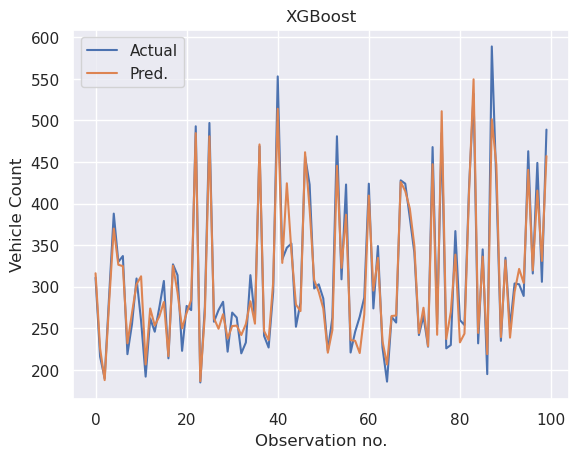

In [13]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Vehicle Count", "075_xgboost_predictions")

## Random Forest

### Run CV

In [14]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("073_cuda_random_forest")

In [17]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params,n_jobs=-1))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...
Fold 0 took 0.41684460639953613 seconds to fit!
Running fold 1...
Fold 1 took 0.38178253173828125 seconds to fit!
Running fold 2...
Fold 2 took 0.36877012252807617 seconds to fit!
Running fold 3...
Fold 3 took 0.38297128677368164 seconds to fit!
Running fold 4...
Fold 4 took 0.3860597610473633 seconds to fit!
Running fold 5...
Fold 5 took 0.40503525733947754 seconds to fit!
Running fold 6...
Fold 6 took 0.4012470245361328 seconds to fit!
Running fold 7...
Fold 7 took 0.41765832901000977 seconds to fit!
Running fold 8...
Fold 8 took 0.38178133964538574 seconds to fit!
Running fold 9...
Fold 9 took 0.38784027099609375 seconds to fit!


{'model': 'Random Forest',
 'r2': 0.9261233542623337,
 'mae': 20.191592954946238,
 'mape': 0.07195401775735784,
 'mse': 720.1143503549595,
 'rmse': 26.768105158972578,
 'time_to_fit': 0.3929990530014038}

### Test using previously unseen data

In [18]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.9310474425385542,
 'mae': 19.10791893869031,
 'mse': 624.2600333279537,
 'rmse': 24.985196283558665,
 'mape': 0.06658197982717408,
 'time_to_fit': 1.2537715435028076}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


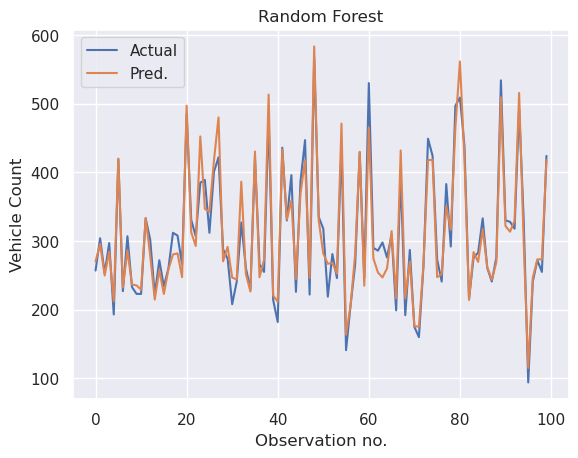

In [19]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Vehicle Count", "075_random_forest_predictions")

## Decision Tree

### Run CV

In [20]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("073_decision_tree")

In [21]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

Running fold 0...
Fold 0 took 0.0114898681640625 seconds to fit!
Running fold 1...
Fold 1 took 0.020915746688842773 seconds to fit!
Running fold 2...
Fold 2 took 0.013744115829467773 seconds to fit!
Running fold 3...
Fold 3 took 0.011862516403198242 seconds to fit!
Running fold 4...
Fold 4 took 0.009694814682006836 seconds to fit!
Running fold 5...
Fold 5 took 0.009371519088745117 seconds to fit!
Running fold 6...
Fold 6 took 0.008690118789672852 seconds to fit!
Running fold 7...
Fold 7 took 0.009644269943237305 seconds to fit!
Running fold 8...
Fold 8 took 0.00850534439086914 seconds to fit!
Running fold 9...
Fold 9 took 0.008861064910888672 seconds to fit!


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'model': 'Decision Tree',
 'r2': 0.8949344852767791,
 'mae': 23.180614599368994,
 'mape': 0.08368368137355908,
 'mse': 1019.6209003761963,
 'rmse': 31.786653763591534,
 'time_to_fit': 0.01127793788909912}

### Test using previously unseen data

In [22]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.9020541934509565,
 'mae': 23.103493815793072,
 'mse': 886.7495958337314,
 'rmse': 29.778341052411424,
 'mape': 0.07995281793119866,
 'time_to_fit': 0.018811702728271484}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


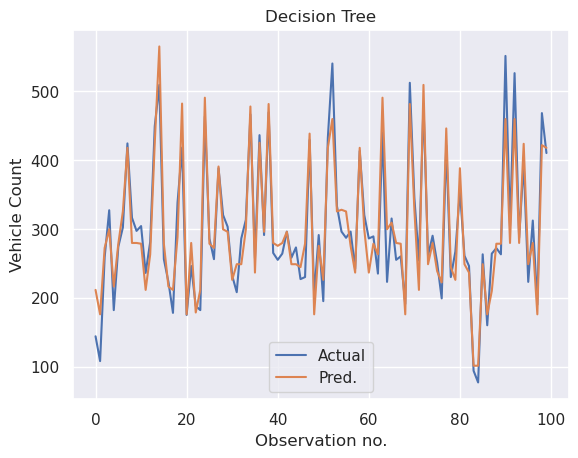

In [23]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Vehicle Count", "075_decision_tree_predictions")

## MLP

### Run CV

In [24]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("073_mlpr")

In [25]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Running fold 0...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 0 took 5.116726875305176 seconds to fit!
Running fold 1...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 took 4.62848973274231 seconds to fit!
Running fold 2...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 took 6.241932153701782 seconds to fit!
Running fold 3...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 took 5.7973854541778564 seconds to fit!
Running fold 4...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 took 5.326260089874268 seconds to fit!
Running fold 5...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5 took 5.014282941818237 seconds to fit!
Running fold 6...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 6 took 4.597513914108276 seconds to fit!
Running fold 7...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 7 took 5.245654344558716 seconds to fit!
Running fold 8...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8 took 4.104647636413574 seconds to fit!
Running fold 9...
Fold 9 took 4.338930368423462 seconds to fit!


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLP',
 'r2': 0.3867877505513828,
 'mae': 62.32968,
 'mape': 0.21359198,
 'mse': 5989.2954,
 'rmse': 77.326904,
 'time_to_fit': 5.041182351112366}

### Test using previously unseen data

In [26]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLP',
 'r2': 0.3642858783878088,
 'mae': 61.04589,
 'mse': 5755.42,
 'rmse': 75.86449,
 'mape': 0.20684971,
 'time_to_fit': 5.591903924942017}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


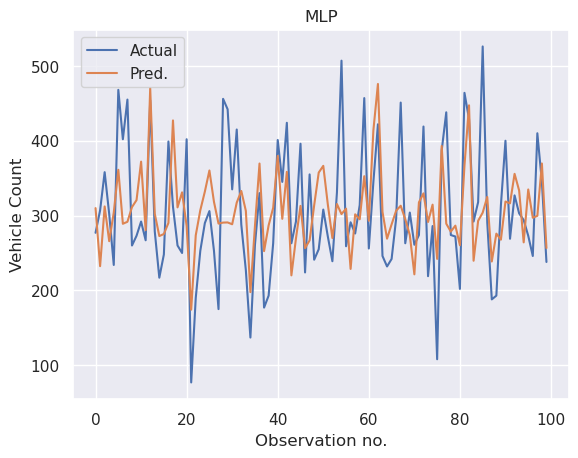

In [27]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Vehicle Count", "075_mlp_predictions")

# Store metrics

In [28]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/075_yonge_count_weather_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/075_yonge_count_weather_metrics.csv.zip",index=False,compression="zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


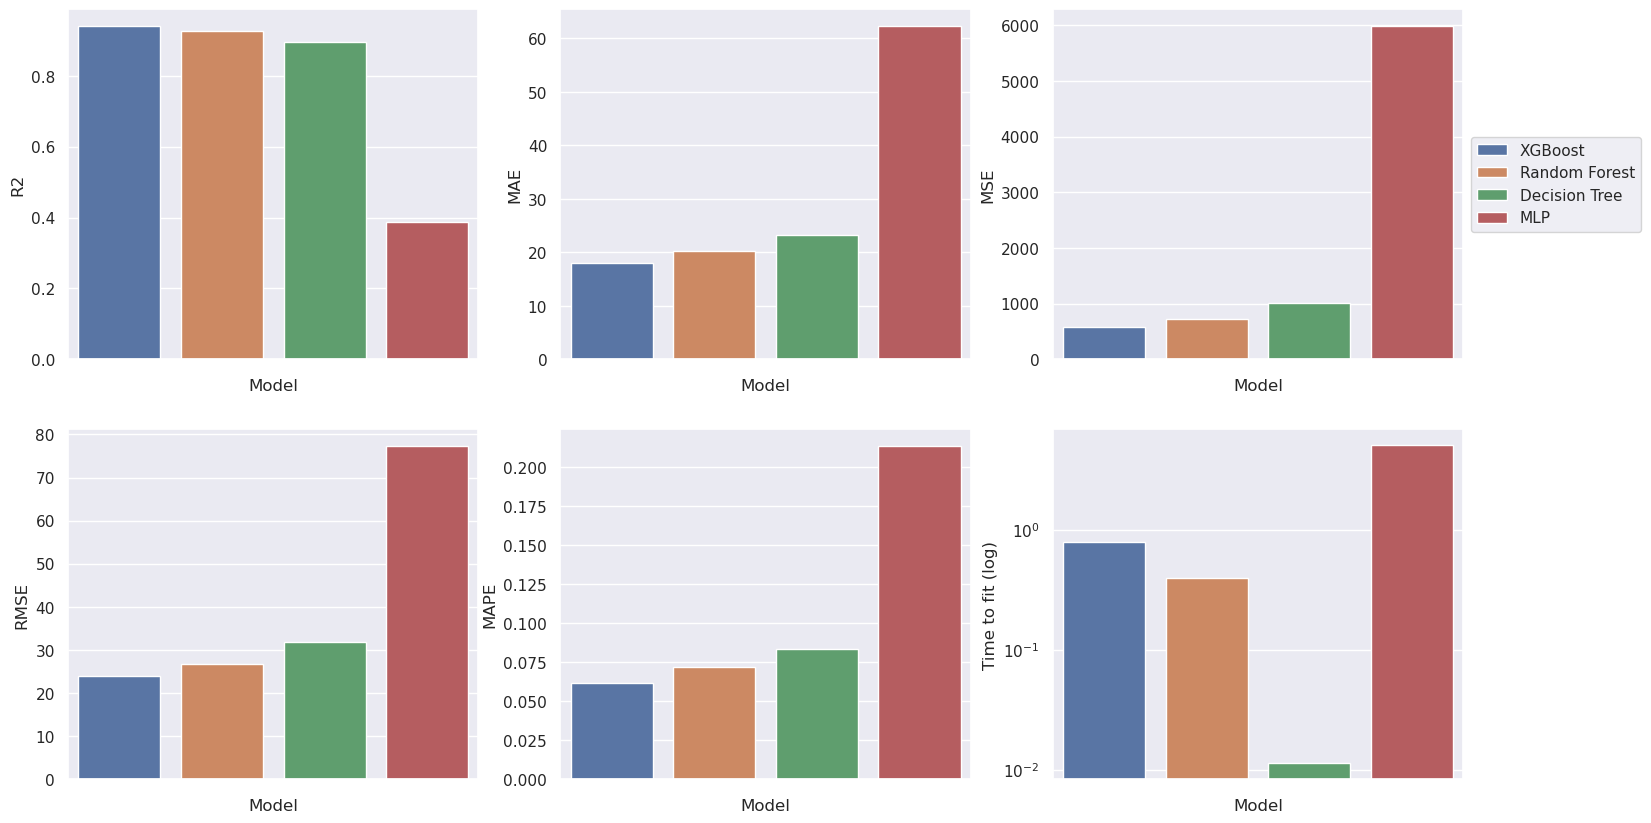

In [29]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/075_yonge_count_weather_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/075_yonge_count_weather_cv_metrics.png",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


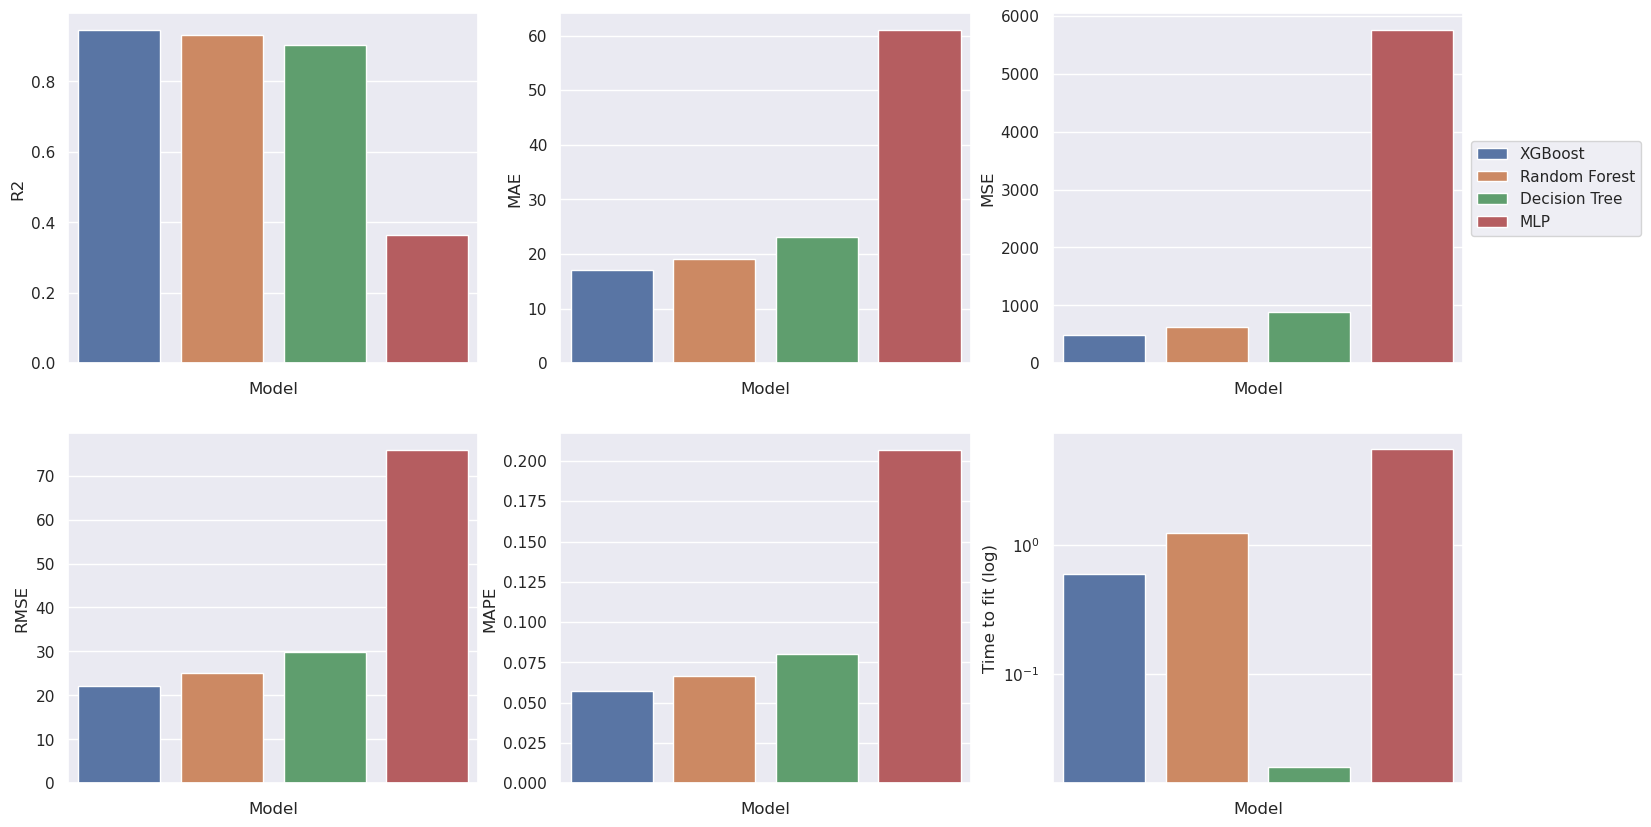

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/075_yonge_count_weather_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/075_yonge_count_weather_metrics.png",bbox_inches="tight")